In [16]:
import numpy as np
import tensorflow as tf
import keras
import graphviz

from __future__ import print_function
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.utils import plot_model

from PIL import Image

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
%matplotlib inline

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5974221749387484703
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6972221031
locality {
  bus_id: 1
}
incarnation: 8751105145760362369
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


После некоторых мучений удалось настроить Keras на работу с TensorFlow-GPU

In [3]:
np.random.seed(42)

### 1. Реализуем простую нейронную сеть для распознавания цифр из набора MNIST

In [4]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # количество классов = числу цифр
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Каждый образец в наборе представлен массивом 28 x 28, в каждой ячейке которого обозначена яркость соответствующего пикселя от 0 до 255. Набор данных MNIST это набор написанных вручную чисел. Все изображения нормализованы так, чтобы вместиться в квадрат 20 х 20 пикселей, и затем центрированы в изображение размером 28 х 28 пикселей относительно центра масс изображения.

(-0.5, 27.5, 27.5, -0.5)

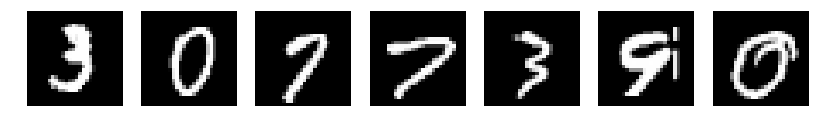

In [27]:
# Несколько цифр для примера
fig = figure(figsize=(14,10))

fig.add_subplot(1,7,1)
imshow(X_train[10] ,cmap='Greys_r')
axis('off')
fig.add_subplot(1,7,2)
imshow(X_train[1000] ,cmap='Greys_r')
axis('off')
fig.add_subplot(1,7,3)
imshow(X_train[9999] ,cmap='Greys_r')
axis('off')
fig.add_subplot(1,7,4)
imshow(X_train[15721] ,cmap='Greys_r')
axis('off')
fig.add_subplot(1,7,5)
imshow(X_train[25000] ,cmap='Greys_r')
axis('off')
fig.add_subplot(1,7,6)
imshow(X_train[37111] ,cmap='Greys_r')
axis('off')
fig.add_subplot(1,7,7)
imshow(X_train[48911] ,cmap='Greys_r')
axis('off')

In [6]:
pictures_train_count = X_train.shape[0]
pictures_test_count = X_test.shape[0]
print(pictures_train_count)
print(pictures_test_count)

60000
10000


In [7]:
RESHAPED = 784
X_train = X_train.reshape(pictures_train_count, RESHAPED)
X_test = X_test.reshape(pictures_test_count, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# нормировка яркости пикселя
X_train /= 255
X_test /= 255

In [9]:
# преобразование векторов классов в бинарные матрицы классов (one-hot encoding)
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [10]:
y_train.shape

(60000, 10)

In [11]:
# Последний слой - один нейрон с функцией активации softmax,
# аггрегирующий 10 ответов предыдущего слоя из 10 нейронов
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [13]:
plot_model(model, to_file='model1.png')

In [14]:
# Обучение модели
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 29us/step - loss: 0.7510 - acc: 0.8144 - val_loss: 0.4077 - val_acc: 0.8958
Epoch 2/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.3899 - acc: 0.8966 - val_loss: 0.3347 - val_acc: 0.9110
Epoch 3/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.3382 - acc: 0.9083 - val_loss: 0.3076 - val_acc: 0.9171
Epoch 4/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.3145 - acc: 0.9135 - val_loss: 0.2931 - val_acc: 0.9198
Epoch 5/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.3006 - acc: 0.9166 - val_loss: 0.2853 - val_acc: 0.9216
Epoch 6/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2907 - acc: 0.9189 - val_loss: 0.2785 - val_acc: 0.9235
Epoch 7/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2837 - acc: 0.9211 - val_loss: 0.2746 - 

Epoch 118/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2182 - acc: 0.9386 - val_loss: 0.2731 - val_acc: 0.9289
Epoch 119/200
48000/48000 [==============================] - 1s 25us/step - loss: 0.2183 - acc: 0.9391 - val_loss: 0.2724 - val_acc: 0.9291
Epoch 120/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2180 - acc: 0.9395 - val_loss: 0.2725 - val_acc: 0.9296
Epoch 121/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.2181 - acc: 0.9395 - val_loss: 0.2722 - val_acc: 0.9297
Epoch 122/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.2179 - acc: 0.9394 - val_loss: 0.2760 - val_acc: 0.9273
Epoch 123/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2183 - acc: 0.9391 - val_loss: 0.2754 - val_acc: 0.9290
Epoch 124/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.2178 - acc: 0.9391 - val_loss: 0.2736 - val_acc: 0.9294
Epoch 125/200
48000/

In [15]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 0s 33us/step
Test score:  0.2984068250253797
Test accuracy:  0.927


#### Добавим скрытые слои

In [16]:
# Усложним сеть, добавив 2 скрытых слоя с N_HIDDEN=128 нейронами. Т.е. сеть состоит из
# входного слоя (784 нейрона, по кол-ву пикселей), 2 скрытых слоёв (по 128 нейронов), выходного слоя (10 нейронов),
# выхода (1 нейрон)
NB_EPOCH = 50
DROPOUT = 0.3

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
__________

In [17]:
plot_model(model, to_file='model2.png')

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.3568 - acc: 0.8918 - val_loss: 0.1433 - val_acc: 0.9586
Epoch 2/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.1905 - acc: 0.9439 - val_loss: 0.1162 - val_acc: 0.9652
Epoch 3/50
48000/48000 [==============================] - 2s 31us/step - loss: 0.1522 - acc: 0.9543 - val_loss: 0.1105 - val_acc: 0.9663
Epoch 4/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.1342 - acc: 0.9593 - val_loss: 0.1056 - val_acc: 0.9688
Epoch 5/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.1230 - acc: 0.9626 - val_loss: 0.0968 - val_acc: 0.9708
Epoch 6/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.1120 - acc: 0.9657 - val_loss: 0.0941 - val_acc: 0.9705
Epoch 7/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.1014 - acc: 0.9689 - val_loss: 0.0902 - val_acc

In [19]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 0s 35us/step
Test score:  0.08500177006984158
Test accuracy:  0.9797


In [20]:
model.save('model2.h5')

### 2. Свёрточная нейронная сеть для той же задачи

In [35]:
# Немного разберёмся с понятием свёртки

In [34]:
x_inp = tf.placeholder(tf.float32, [5, 5])
w_inp = tf.placeholder(tf.float32, [3, 3])

In [36]:
# [размер батча, высота, ширина, каналы]
x = tf.reshape(x_inp, [1, 5, 5, 1])
# [высота, ширина, входные каналы, выходные каналы]
w = tf.reshape(w_inp, [3, 3, 1, 1])

In [37]:
x_valid = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding="VALID")
x_same = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding="SAME")
x_valid_half = tf.nn.conv2d(x, w, strides=[1, 2, 2, 1], padding="VALID")
x_same_half = tf.nn.conv2d(x, w, strides=[1, 2, 2, 1], padding="SAME")

In [38]:
x = np.array([[0, 1, 2, 1, 0],
              [4, 1, 0, 1, 0],
              [2, 0, 1, 1, 1],
              [1, 2, 3, 1, 0],
              [0, 4, 3, 2, 0]])
w = np.array([[0, 1, 0],
              [1, 0, 1],
              [2, 1, 0]])

In [39]:
sess = tf.Session()
y_valid, y_same, y_valid_half, y_same_half = sess.run(
    [x_valid, x_same, x_valid_half, x_same_half],
    feed_dict={x_inp: x, w_inp: w}
)

In [40]:
print("padding=VALID:\n", y_valid[0, :, :, 0])
print("padding=SAME:\n", y_same[0, :, :, 0])
print("padding=VALID, stride 2:\n", y_valid_half[0, :, :, 0])
print("padding=SAME, stride 2:\n", y_same_half[0, :, :, 0])

padding=VALID:
 [[ 9.  5.  4.]
 [ 8.  8. 10.]
 [ 8. 15. 12.]]
padding=SAME:
 [[ 5. 11.  4.  3.  3.]
 [ 3.  9.  5.  4.  4.]
 [ 5.  8.  8. 10.  3.]
 [ 4.  8. 15. 12.  6.]
 [ 5.  5.  9.  4.  2.]]
padding=VALID, stride 2:
 [[ 9.  4.]
 [ 8. 12.]]
padding=SAME, stride 2:
 [[5. 4. 3.]
 [5. 8. 3.]
 [5. 9. 2.]]
